In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('data.csv')
print(df.head())
print()
df.info() 

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [15]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce', dayfirst=True)
print(df['Дата'].dtype)  
print(df.head())  

datetime64[ns]
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-04-01      1  address_0    product_0           4
1 2018-04-01      1  address_0    product_1           4
2 2018-04-01      1  address_0    product_2           5
3 2018-04-01      1  address_0    product_3          10
4 2018-04-01      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [93]:
# Группируем по дате и считаем количество продаж
df_grouped = df.groupby("Дата")["Количество"].sum().reset_index(name="Количество продаж")
print(df_grouped.head())

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055


Вывести несколько первых строк сгруппированных данных

In [94]:
print(df_grouped.head(10))

        Дата  Количество продаж
0 2018-01-04               3734
1 2018-01-05               3643
2 2018-01-06               3193
3 2018-01-07               3298
4 2018-01-09               4055
5 2018-01-10               3653
6 2018-01-11               3176
7 2018-01-12               3092
8 2018-01-13               3294
9 2018-01-14               3228


Нарисуйте график продаж у `grouped_df`

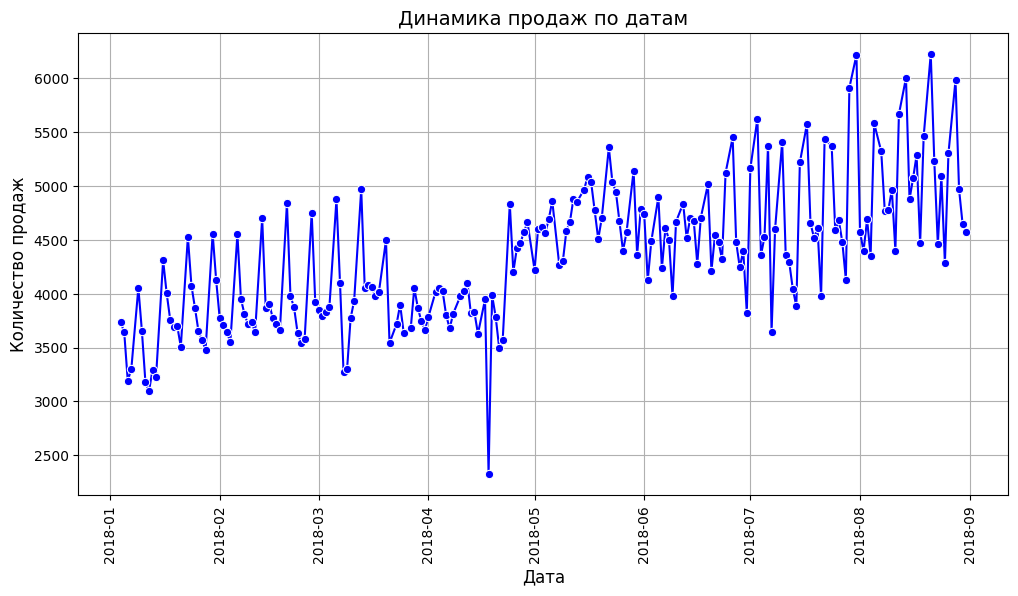

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Дата', y='Количество продаж', color="blue", marker='o')
plt.title("Динамика продаж по датам", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Количество продаж", fontsize=12)
plt.xticks(rotation=90)

plt.grid(True)
plt.show()



Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
'''

    Период: январь — декабрь 2018.
    Продажи колеблются от 3000 до 5700.
    График показывает цикличные всплески и спады, примерно раз в месяц.
    Пики в мае и декабре (возможные акции, праздники).
    Минимумы в июле и ноябре.
    Тренд в целом стабильный, но с высокой волатильностью.
    Возможные причины: сезонность, промоакции, внешние факторы.

'''

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [102]:
import pandas as pd

df = pd.read_csv('data.csv')
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > upper_bound]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier)

Дата             2018-06-28
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [104]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

df_filtered = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  
    (df['Дата'].dt.day_name() == 'Wednesday') &  
    (df['Склад'] == 3)
]

top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()
top_sales = df_filtered.groupby('Номенклатура')['Количество'].sum().max()

print(f'Топовый товар по продажам по средам за лето на складе №3: {top_product} ({top_sales} шт.)')



Топовый товар по продажам по средам за лето на складе №3: product_1 (2267 шт.)


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [6]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
import pandas as pd

weather_df = pd.read_excel('Temperature_01.01.2018-31.08.2018.xlsx')
# weather_df.shape
# weather_df.info()
# weather_df.isnull().sum()
weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN


In [142]:
# Преобразуем дату в формат datetime
weather_df["Местное время в Астане"] = pd.to_datetime(weather_df["Местное время в Астане"], format="%d.%m.%Y %H:%M")
# Добавляем новый столбец дата
weather_df["Дата"] = weather_df["Местное время в Астане"].dt.date  # Только дата (без времени)

# # Средняя температура по дням
avg_temp_by_day = weather_df.groupby("Дата")["T"].mean().reset_index()
print("Средняя температура по дням:\n", avg_temp_by_day.head())

# # Преобразуем столбец "Дата" в формат datetime
avg_temp_by_day["Дата"] = pd.to_datetime(avg_temp_by_day["Дата"], format="%Y-%m-%d", errors='coerce')

# # Объединяем таблицы по дате левое соединение 
merged_df = pd.merge(df_grouped, avg_temp_by_day[["Дата", "T"]], on="Дата", how="left")

# # Просмотр информации о полученной таблице
merged_df.isnull().sum()

Средняя температура по дням:
          Дата        T
0  2018-01-01  -9.4625
1  2018-01-02  -9.5125
2  2018-01-03 -11.4625
3  2018-01-04 -14.0750
4  2018-01-05 -16.8625


Дата                 0
Количество продаж    0
T                    0
dtype: int64

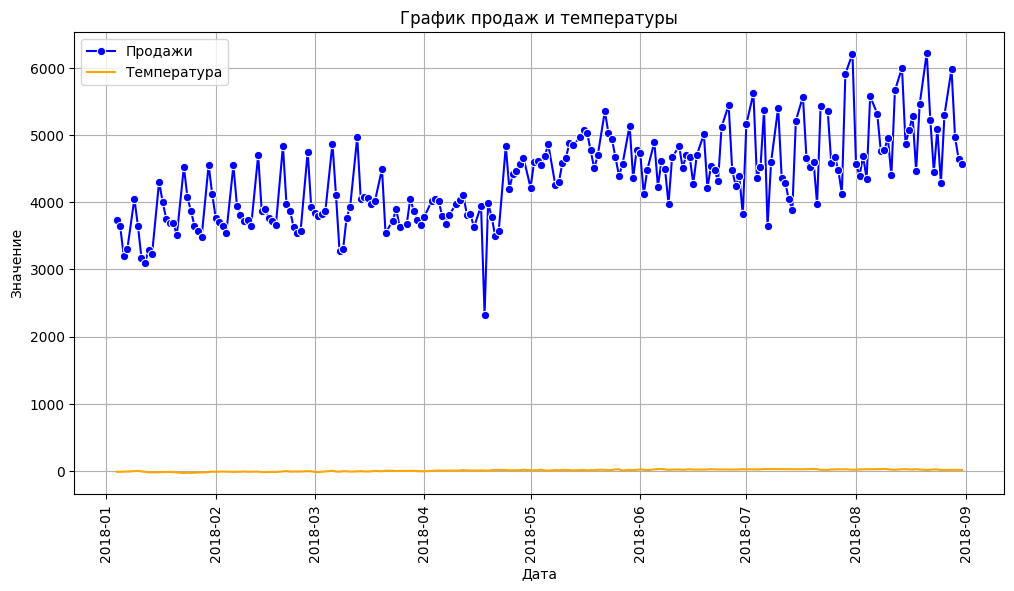

In [152]:
# 1 График "Количество продаж" и "Температура" на одной оси
plt.figure(figsize=(12, 6))

sns.lineplot(data=merged_df, x="Дата", y="Количество продаж", marker="o", color="blue", label="Продажи")
sns.lineplot(data=merged_df, x="Дата", y="T", color="orange", label="Температура")

plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График продаж и температуры")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

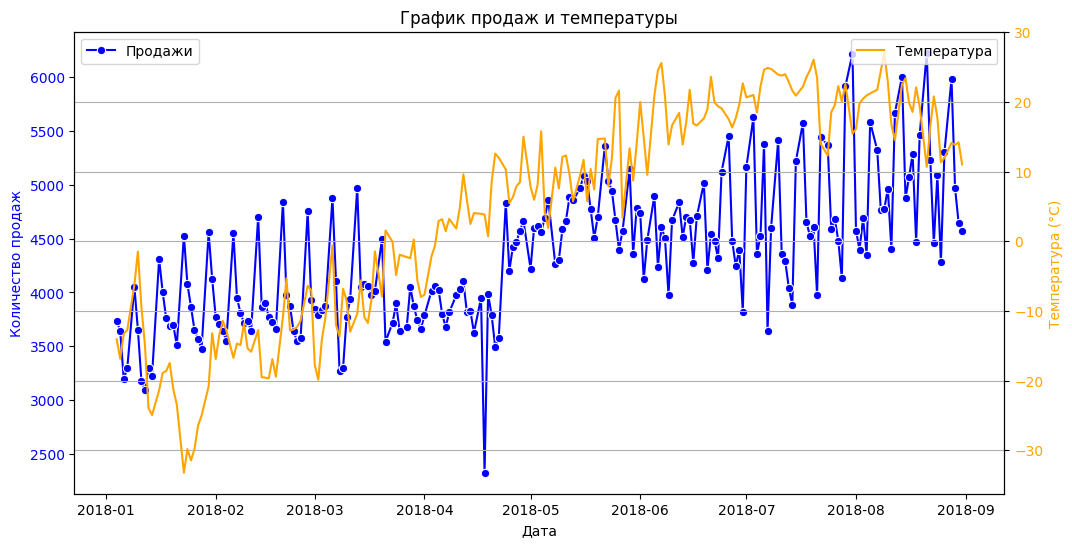

In [151]:

# Создаем график
fig, ax1 = plt.subplots(figsize=(12, 6))

# Линия продаж (основная ось Y)
sns.lineplot(data=merged_df, x="Дата", y="Количество продаж", marker="o", color="blue", label="Продажи", ax=ax1)
ax1.set_xlabel("Дата")
ax1.set_ylabel("Количество продаж", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Вторая ось Y для температуры
ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x="Дата", y="T", color="orange", label="Температура", ax=ax2)
ax2.set_ylabel("Температура (°C)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Финальные настройки
plt.title("График продаж и температуры")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.xticks(rotation=90)
plt.grid()

plt.show()

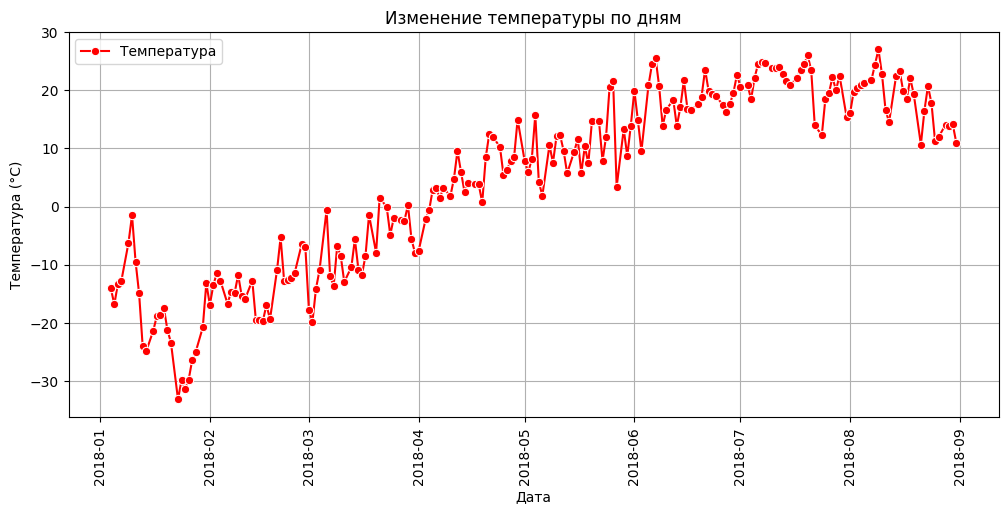

In [146]:
# График температуры отдельно
plt.figure(figsize=(12, 5))
sns.lineplot(data=merged_df, x="Дата", y="T", marker="o", color="red", label="Температура")

plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Изменение температуры по дням")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()